## Exam Seaborn Exercise

import numpy, pandas ,display, matplotlib and seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [4]:
#Read the table
mpg = pd.read_csv("mpg.csv")
display(mpg)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


**EX 1**
test practice

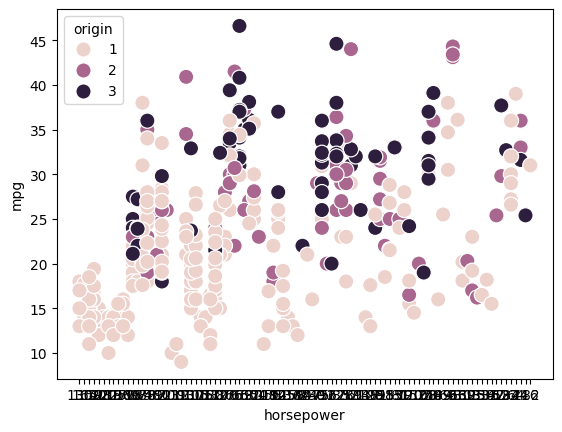

In [6]:
sns.scatterplot(data=mpg, x='horsepower', y='mpg',s=120, hue='origin')

plt.show()

**EX 2**
test practice

<Axes: xlabel='cylinders', ylabel='mpg'>

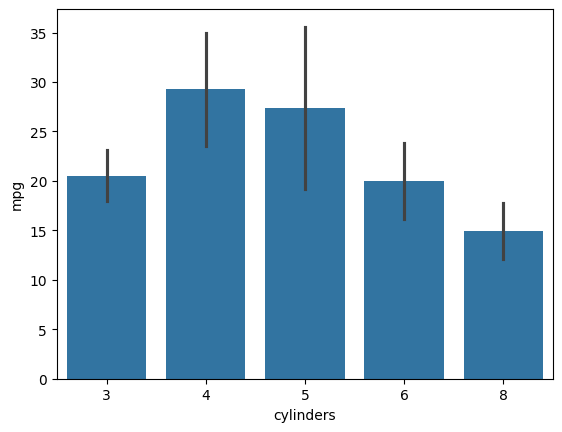

In [8]:
sns.barplot(data=mpg, x='cylinders', y='mpg', errorbar='sd')

# No, vehicles with 4 cylinders require more gas then vehicles with 8 cylinders

**EX 3**
test practice

<Axes: xlabel='origin', ylabel='count'>

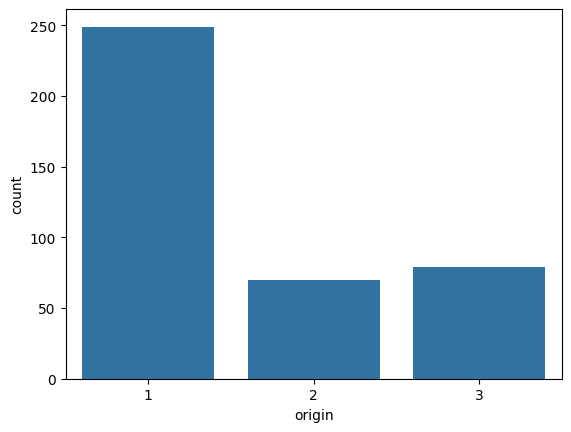

In [12]:
sns.countplot(data=mpg, x='origin')

# Country #1 has the most vehicles in the file

**EX 4**
test practice

<Axes: xlabel='weight', ylabel='Count'>

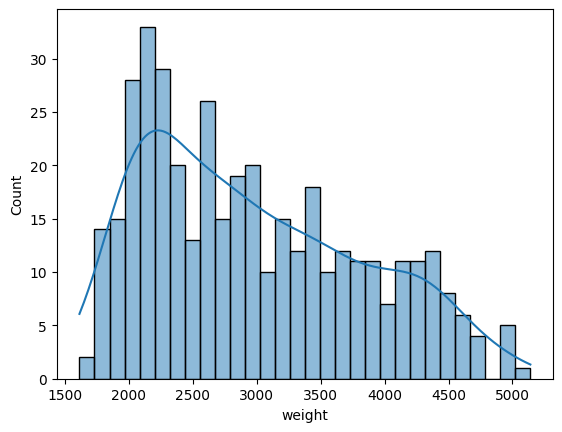

In [14]:
sns.histplot(data=mpg, x='weight', bins=30,  kde=True)  # histogram. y = count

**EX 5**
test practice

<Axes: xlabel='cylinders', ylabel='mpg'>

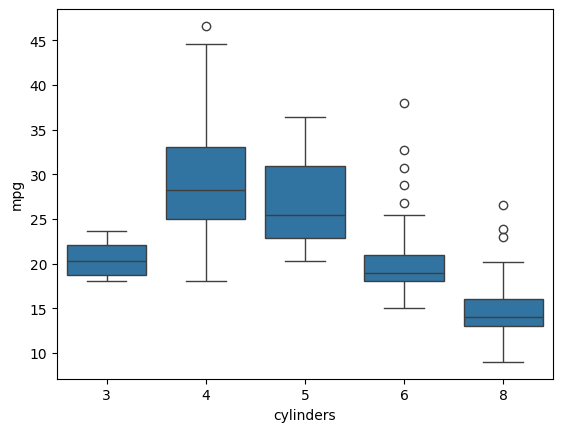

In [17]:
sns.boxplot(data=mpg, x='cylinders', y='mpg')

## Exam Pandas Exercise

In [47]:
#Read the tables
books = pd.read_csv("books.csv")
books_sales = pd.read_csv("books_sales.csv")

# Make a copy of each table
books_df = books.copy()
books_sales_df = books_sales.copy()

display(books_df)
display(books_sales_df)

# Find duplicates
dup = books_df[books_df['catalog_number'].duplicated(keep=False)].sort_values('catalog_number')
dup['non_nan_count'] = dup.notna().sum(axis=1)
dup.sort_values(['catalog_number', 'non_nan_count'], ascending=[True, False], inplace=True)

# Seperate the duplicates to books we keep and books we remove
kept = dup.drop_duplicates(subset=['catalog_number'], keep='first')
removed = dup[~dup['book_id'].isin(kept['book_id'])]

# Update the books table to remove the duplicates with more NaN values
books_df = books_df[~books_df['book_id'].isin(removed['book_id'])]

# Merge removed and kept to easily extract a dictionary of book_ids
merged = removed.merge(kept, how='inner', on='catalog_number', suffixes=('_removed', '_kept'))
dict_replace = dict(zip(merged['book_id_removed'], merged['book_id_kept']))

# Update the books_sales table based on the above dictionary
books_sales_df['book_id'] = books_sales_df['book_id'].replace(dict_replace)

display(books_df)
display(books_sales_df)

,book_id,author_name,title,publication_year,catalog_number
0,82471,Justin Cook,Rise of the Fallen,2008.0,CAT-1001
1,48525,Teresa Olson,Dreams of Steel,1969.0,CAT-1002
2,85837,Cindy Hickman,Memories of Tomorrow,1998.0,CAT-1003
3,91385,Theresa Shaw,Secrets of the Mind,1984.0,CAT-1004
4,39428,James White,Shadows of Time,2004.0,CAT-1005
5,54092,Leah Jackson,Winds of Change,1958.0,CAT-1006
6,29735,Andrea Davis,The Last Empire,2001.0,CAT-1007
7,87992,Dr. Heather Aguirre,The Final Chapter,2013.0,CAT-1008
8,92222,Teresa Mclaughlin,Rise of the Fallen,1978.0,CAT-1009
9,17977,Philip Cummings,A Tale of Two Cities,1983.0,CAT-1010


,sale_date,book_id,sale_price,store_name
0,20/04/2024,12863,39.37,Marshall-Moore
1,01/08/2024,12863,76.76,Price Ltd
2,30/12/2023,12863,13.97,Jenkins-Munoz
3,31/05/2024,14187,76.16,Jackson and Sons
4,26/04/2023,14187,45.11,Clark-Walker
...,...,...,...,...
95,08/10/2024,92659,40.21,"Mayer, Knight and Patterson"
96,25/01/2025,92659,52.49,Dean Inc
97,21/07/2023,92659,37.52,Green PLC
98,01/03/2024,92800,94.52,Hill PLC


,book_id,author_name,title,publication_year,catalog_number
0,82471,Justin Cook,Rise of the Fallen,2008.0,CAT-1001
1,48525,Teresa Olson,Dreams of Steel,1969.0,CAT-1002
2,85837,Cindy Hickman,Memories of Tomorrow,1998.0,CAT-1003
3,91385,Theresa Shaw,Secrets of the Mind,1984.0,CAT-1004
4,39428,James White,Shadows of Time,2004.0,CAT-1005
5,54092,Leah Jackson,Winds of Change,1958.0,CAT-1006
6,29735,Andrea Davis,The Last Empire,2001.0,CAT-1007
7,87992,Dr. Heather Aguirre,The Final Chapter,2013.0,CAT-1008
8,92222,Teresa Mclaughlin,Rise of the Fallen,1978.0,CAT-1009
9,17977,Philip Cummings,A Tale of Two Cities,1983.0,CAT-1010


,sale_date,book_id,sale_price,store_name
0,20/04/2024,12863,39.37,Marshall-Moore
1,01/08/2024,12863,76.76,Price Ltd
2,30/12/2023,12863,13.97,Jenkins-Munoz
3,31/05/2024,14187,76.16,Jackson and Sons
4,26/04/2023,14187,45.11,Clark-Walker
...,...,...,...,...
95,08/10/2024,92659,40.21,"Mayer, Knight and Patterson"
96,25/01/2025,92659,52.49,Dean Inc
97,21/07/2023,92659,37.52,Green PLC
98,01/03/2024,39188,94.52,Hill PLC
